# EDA of Hotel Booking Cancellation

In [ ]:
#  1. hotel 	 Resort hotel or city hotel
#  2. is_canceled 	 Value indicating if the booking was canceled (1) or not (0)
#  3. lead_time 	 Number of days that elapsed between the reservation and the arrival date
#  4. arrival_date_month 	 Month of arrival date
#  5. arrival_date_week_number 	 Week number of year for arrival date
#  6. stays_in_weekend_nights 	 Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
#  7. stays_in_week_nights 	 Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
#  8. adults 	 Number of adults
#  9. children 	 Number of children
# 10. babies 	 Number of babies
# 11. meal 	  Type of meal booked
# 12. is_repeated_guest 	 Value indicating if the booking name was from a repeated guest
# 13. previous_cancellations 	 Number of previous bookings that were cancelled by the customer prior to the current booking
# 14. previous_bookings_not_canceled 	 Number of previous bookings not cancelled by the customer prior to the current booking
# 15. booking_changes 	 Number of changes made to the booking
# 16. deposit_type 	 Indication on if the customer made a deposit to guarantee the booking. Three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay
# 17. days_in_waiting_list 	 Number of days the booking was in the waiting list before it was confirmed to the customer
# 18. adr 	 Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
# 19. required_car_parking_spaces 	 Number of car parking spaces required by the customer
# 20. total_of_special_requests 	 Number of special requests made by the customer (e.g. twin bed or high floor)
# 21. market_segment 	 Market segment designation.
# 22. customer_type 	 Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
# 23. distribution_channel 	 Booking distribution channel.

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#read csv file using pandas

df = pd.read_csv("C:\\Users\\yeshw\\1A\\Hotel Booking Project\\hotel_bookings.csv")

In [3]:
#to display top 5 rows

df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

# Understanding the data

In [4]:
#to display all columns

pd.set_option('display.max_columns',32)

In [5]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [8]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [9]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [10]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [11]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [12]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [13]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [14]:
df['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

<AxesSubplot:xlabel='hotel', ylabel='count'>

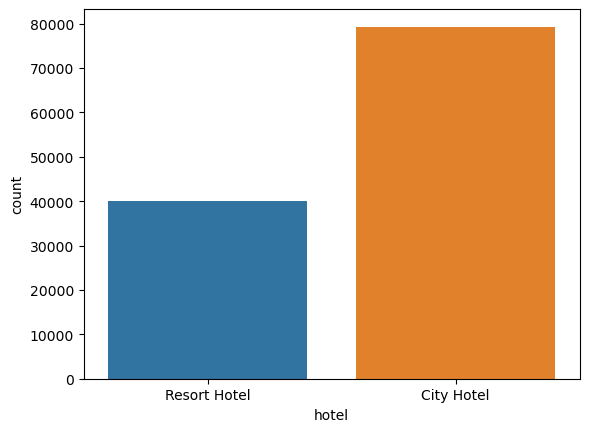

In [15]:
sns.countplot(data=df,x='hotel')

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

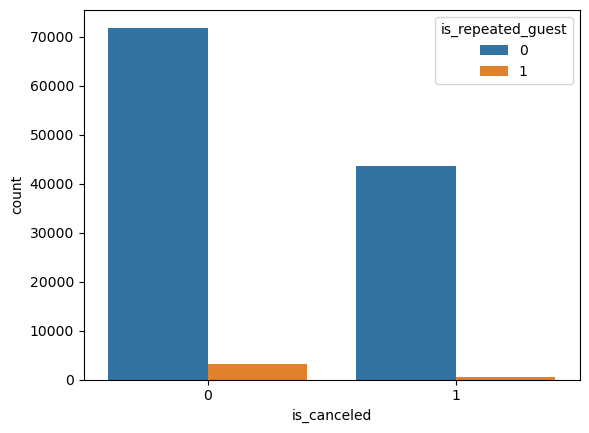

In [16]:
sns.countplot(data=df,x='is_canceled', hue='is_repeated_guest')

<AxesSubplot:xlabel='hotel', ylabel='count'>

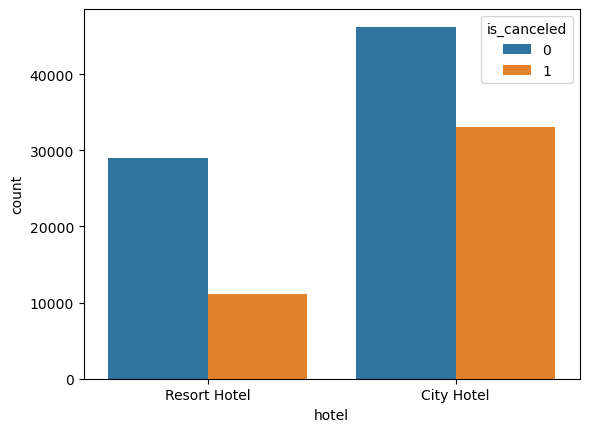

In [17]:
sns.countplot(data=df,x='hotel', hue='is_canceled')

In [4]:
#shows information about the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
#describes statistical info about the data

df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [6]:
#shows the shape of dataset

df.shape

(119390, 32)

In [7]:
#shows the data type of features

df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [32]:
# Checking for missing data

df.isnull().values.any()

True

In [34]:
#to see sum of missing values in each column

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [35]:
#impute missing values

df.fillna(0,inplace=True)

In [36]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [37]:
#meal has value undefined and sc which are same so we will replace with one value

df["meal"].replace("Undefined","SC",inplace=True)

In [38]:
df["meal"].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [39]:
subset=df[(df['children']==0) & (df['adults']==0) & (df['babies']==0)]

In [40]:
subset[['children','adults','babies']]

children  adults  babies
2224         0.0       0       0
2409         0.0       0       0
3181         0.0       0       0
3684         0.0       0       0
3708         0.0       0       0
...          ...     ...     ...
115029       0.0       0       0
115091       0.0       0       0
116251       0.0       0       0
116534       0.0       0       0
117087       0.0       0       0

[180 rows x 3 columns]

In [41]:
type(subset)

pandas.core.frame.DataFrame

In [42]:
delete=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [43]:
type(delete)

pandas.core.series.Series

In [44]:
delete

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [45]:
data=df[~delete]

In [46]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [47]:
subset=data[(data['children']==0) & (data['adults']==0) & (data['babies']==0)]

In [48]:
subset

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

In [49]:
data.shape

(119210, 32)

In [76]:
#To see From which country most of the guests are coming

guest_country = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_country.columns = ['Country', 'Number of guests']
guest_country

Country  Number of guests
0       PRT             21071
1       GBR              9676
2       FRA              8481
3       ESP              6391
4       DEU              6069
..      ...               ...
161     BHR                 1
162     DJI                 1
163     MLI                 1
164     NPL                 1
165     FRO                 1

[166 rows x 2 columns]

In [80]:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [81]:
total_guests=guest_country["Number of guests"].sum()
guest_country["Guests in %"]=round(guest_country["Number of guests"]/total_guests*100,2)

In [82]:
guest_country

Country  Number of guests  Guests in %
0       PRT             21071        28.03
1       GBR              9676        12.87
2       FRA              8481        11.28
3       ESP              6391         8.50
4       DEU              6069         8.07
..      ...               ...          ...
161     BHR                 1         0.00
162     DJI                 1         0.00
163     MLI                 1         0.00
164     NPL                 1         0.00
165     FRO                 1         0.00

[166 rows x 3 columns]

In [86]:
trace= go.Bar(x=guest_country["country"],
    y=guest_country["Number of guests"],
    marker=dict(color='#CD7F32'))
datal = [trace]
layout = go.Layout(title='Guests by Country')
fig = go.Figure(data=data1, layout=layout) 
pyo.plot(fig)

KeyError: 'country'

In [8]:
#Check if data holds duplicate values

df.duplicated().any()


True

In [9]:
#Drop Duplicate entries
# will keep first row and others consider as duplicate

df.drop_duplicates(inplace= False)

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [10]:


df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
#percentage of missing values in columns

null =100 *(df.isna().sum() /df.shape[0])
null

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [12]:
#Column company holds 94% missing data, so we will drop that column.

df.drop('company',axis=1, inplace = True)

In [13]:
df.shape

(119390, 31)

In [14]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


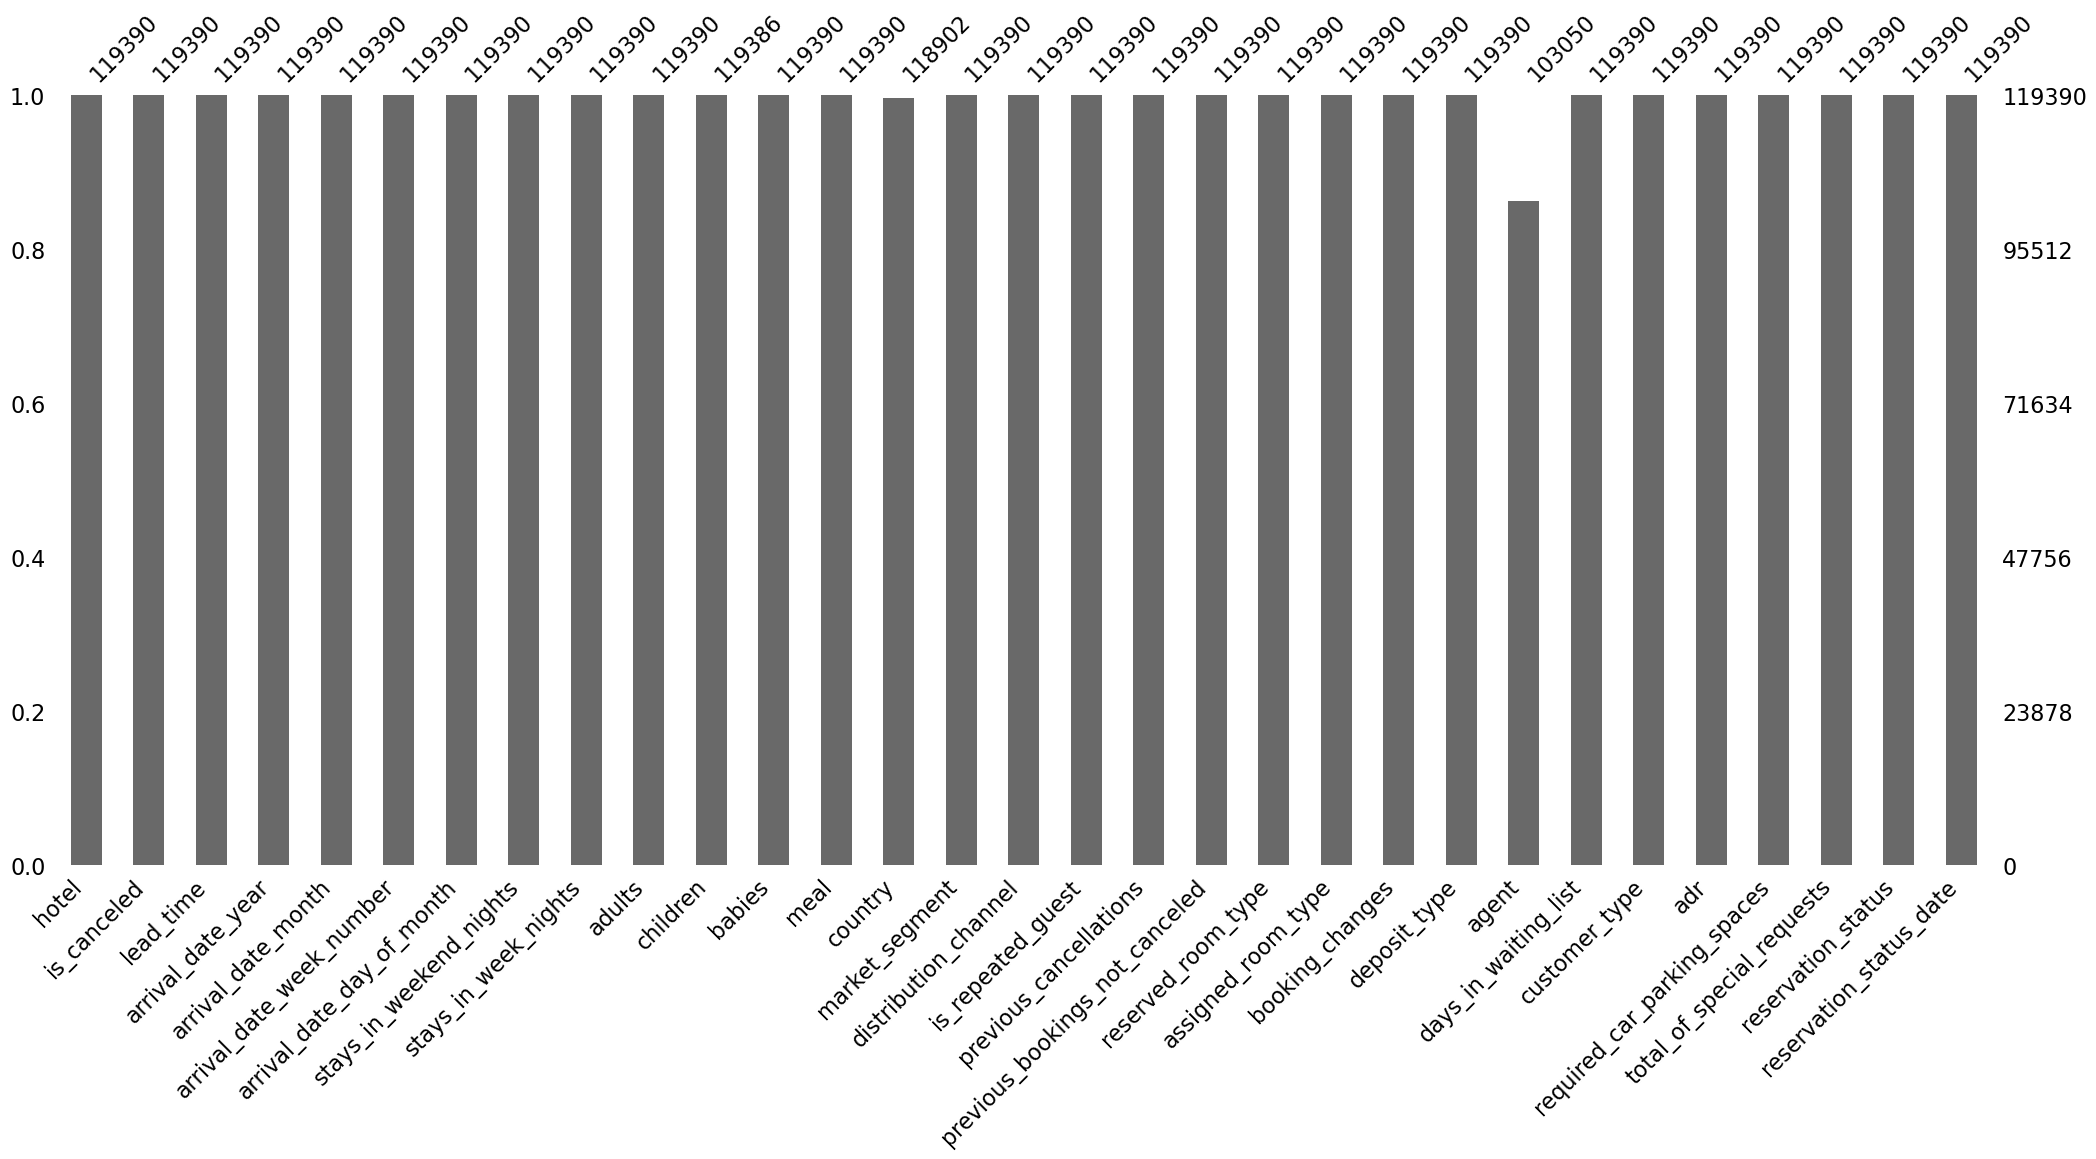

In [15]:
import missingno as msno

msno.bar(df)
plt.show()


<AxesSubplot:>

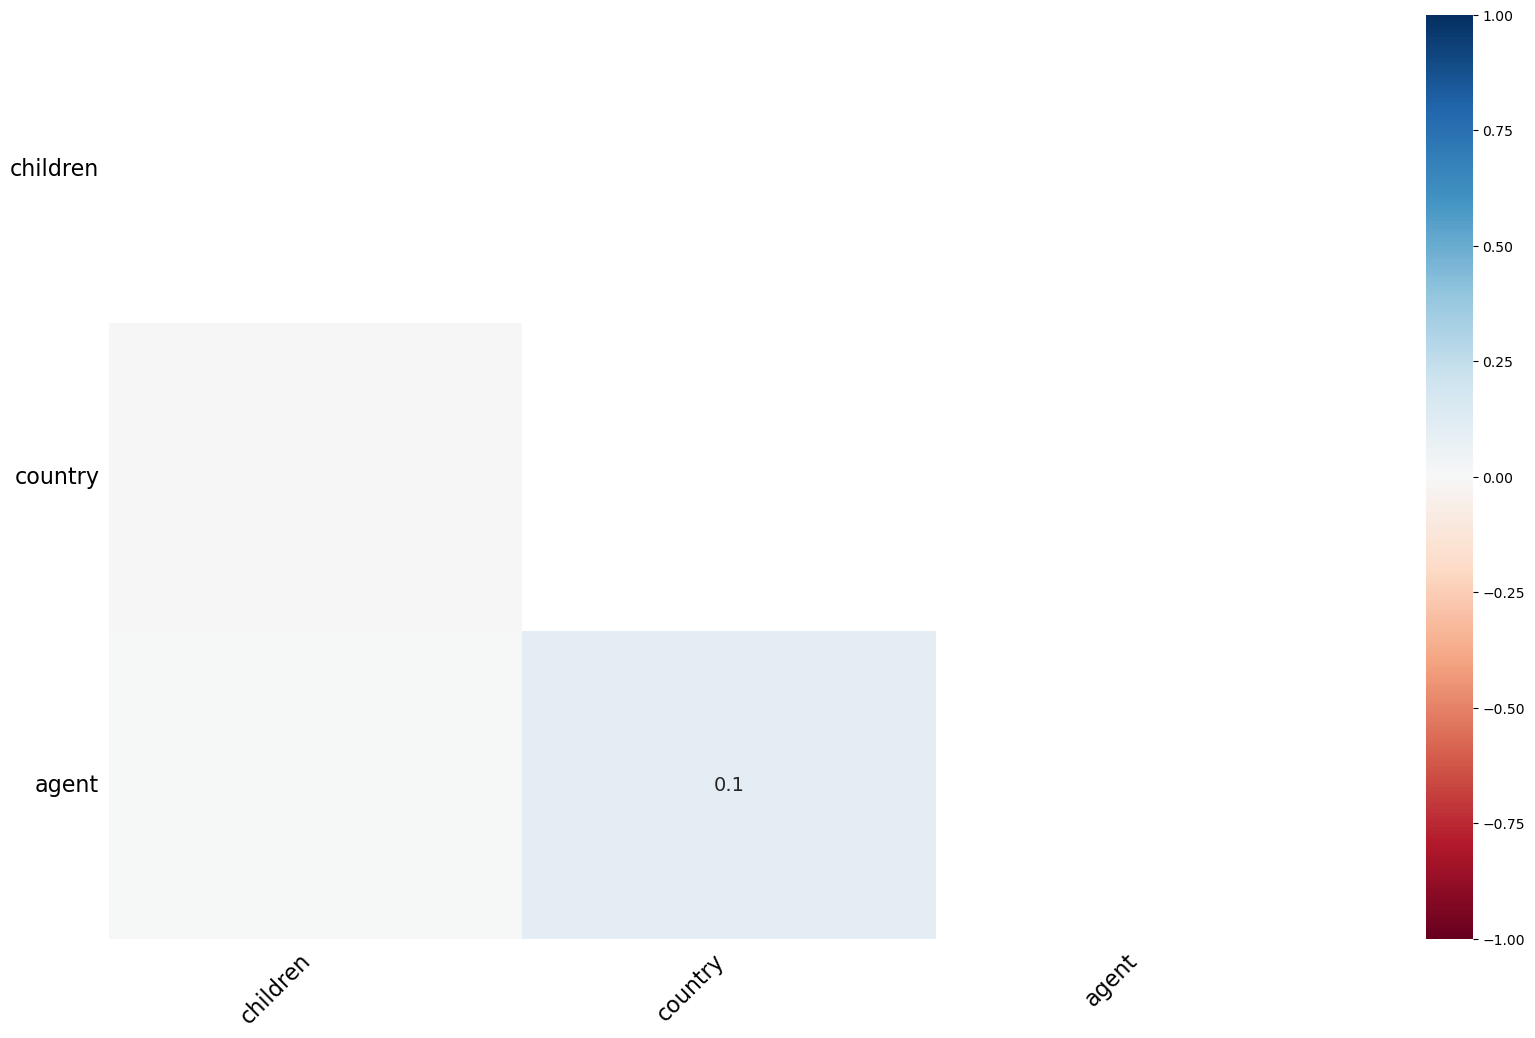

In [16]:
msno.heatmap(df)

In [17]:
#impute missing values

df.fillna(0, inplace = True)

In [18]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
0                          0       2  ...                3    No Deposit   
1                          0       2  ...                4    No Deposit   
2                          1       1  ...                0    No Deposit   
3                          1       1  ...                0    No Deposit   
4                          2       2  ...                0    No Deposit   
...                      ...     ...  ...              ...           ...   
119385                     5       2  ...                0    No Deposit   
119386                     5       3  ...                0    No Deposit   
119387                     5       2  ...                0    No Deposit   
119388                     5       2  ...                0    No Deposit   
119389                     7       2  ...                0    No Deposit   

        agent days_in_waiting_list customer_type     adr  \
0         0.0                    0     Transient    0.00   
1         0.0                    0     Transient    0.00   
2         0.0                    0     Transient   75.00   
3       304.0                    0     Transient   75.00   
4       240.0                    0     Transient   98.00   
...       ...                  ...           ...     ...   
119385  394.0                    0     Transient   96.14   
119386    9.0                    0     Transient  225.43   
119387    9.0                    0     Transient  157.71   
119388   89.0                    0     Transient  104.40   
119389    9.0                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0   

In [19]:
# to see the count

df['is_canceled'].value_counts()


0    75166
1    44224
Name: is_canceled, dtype: int64

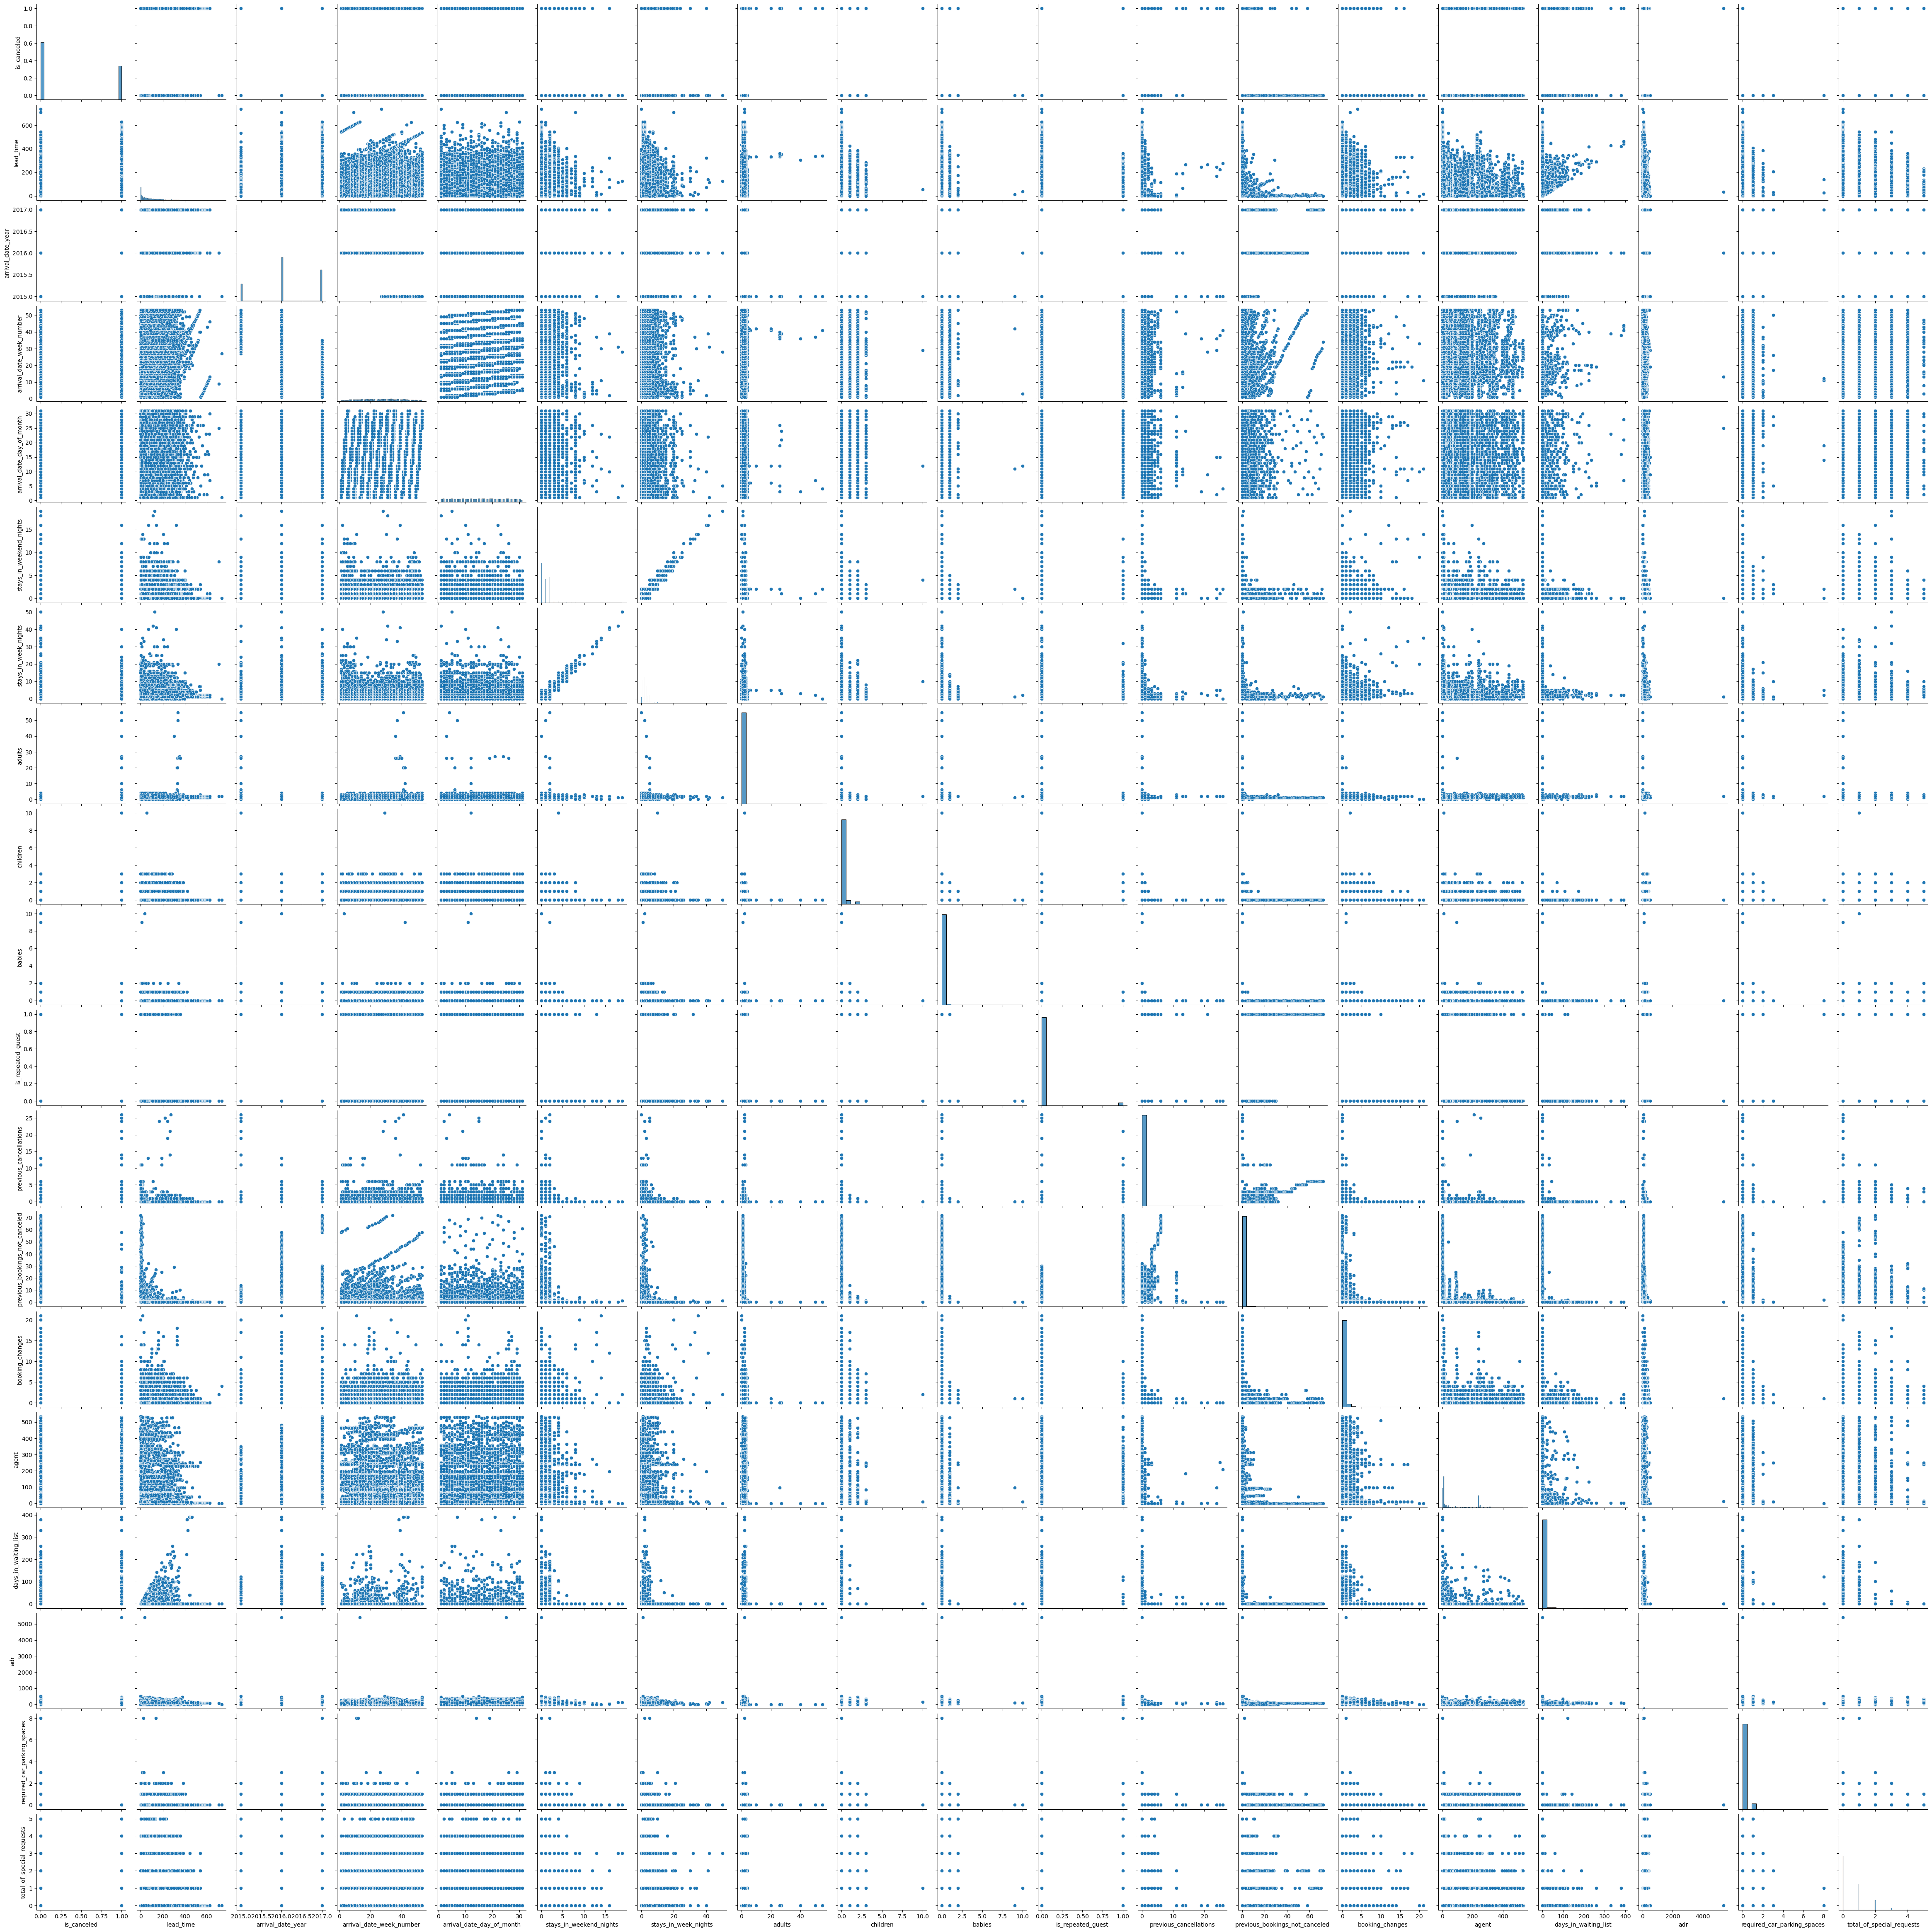

In [20]:
sns.pairplot(df)

In [21]:
#babies, adults, and children can not be zero at the same time, so we will drop all the observations having zero at the same time.

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
2224                       3       0  ...                1    No Deposit   
2409                       0       0  ...                0    No Deposit   
3181                       2       0  ...                0    No Deposit   
3684                       4       0  ...                1    No Deposit   
3708                       4       0  ...                1    No Deposit   
...                      ...     ...  ...              ...           ...   
115029                     3       0  ...                1    No Deposit   
115091                     1       0  ...                0    No Deposit   
116251                     1       0  ...                2    No Deposit   
116534                     5       0  ...                1    No Deposit   
117087                     2       0  ...                0    No Deposit   

        agent days_in_waiting_list    customer_type     adr  \
2224      0.0                    0  Transient-Party    0.00   
2409      0.0                    0        Transient    0.00   
3181     38.0                    0  Transient-Party    0.00   
3684    308.0                  122  Transient-Party    0.00   
3708    308.0                  122  Transient-Party    0.00   
...       ...                  ...              ...     ...   
115029    7.0                    0        Transient  100.80   
115091    0.0                    0        Transient    0.00   
116251  425.0                    0        Transient   73.80   
116534    9.0                    0  Transient-Party   22.86   
117087   52.0                    0        Transient    0.00   

        required_car_parking_spaces  total_of_special_requests  \
2224                              0                          0   
24

Country  No of guests
0       PRT         21071
1       GBR          9676
2       FRA          8481
3       ESP          6391
4       DEU          6069
..      ...           ...
161     BHR             1
162     DJI             1
163     MLI             1
164     NPL             1
165     FRO             1

[166 rows x 2 columns]

In [25]:
# we can also visualize using graphics visualization 
# for that we should install folium module

pip install folium

Note: you may need to restart the kernel to use updated packages.


In [26]:
# here we visualize using graphics visualization

import folium
from folium.plugins import HeatMap
import plotly.express as px
basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'],
                           color = guest_city['No of guests'], hover_name = guest_city['Country'])
guests_map.show()

In [32]:
#Most guests are from Portugal and other countries in Europe.
#What are the Room prices overnights for each month?

data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]


In [33]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.322236
3            February   54.147478
4             January   48.708919
5                July  150.122528
6                June  107.921869
7               March   57.012487
8                 May   76.657558
9            November   48.681640
10            October   61.727505
11          September   96.416860

In [34]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

arrival_date_month         adr
0               April  111.856824
1              August  118.412083
2            December   87.856764
3            February   86.183025
4             January   82.160634
5                July  115.563810
6                June  117.702075
7               March   90.170722
8                 May  120.445842
9            November   86.500456
10            October  101.745956
11          September  112.598452

In [52]:
# Combining the two datasets

combined_dataset = pd.concat(objs = [resort_hotel, city_hotel],axis=1)
combined_dataset

arrival_date_month         adr arrival_date_month         adr
0               April   75.867816              April  111.856824
1              August  181.205892             August  118.412083
2            December   68.322236           December   87.856764
3            February   54.147478           February   86.183025
4             January   48.708919            January   82.160634
5                July  150.122528               July  115.563810
6                June  107.921869               June  117.702075
7               March   57.012487              March   90.170722
8                 May   76.657558                May  120.445842
9            November   48.681640           November   86.500456
10            October   61.727505            October  101.745956
11          September   96.416860          September  112.598452

In [60]:
final_hotel=combined_dataset.drop(combined_dataset.columns[1],axis=1)
final_hotel

arrival_date_month arrival_date_month
0               April              April
1              August             August
2            December           December
3            February           February
4             January            January
5                July               July
6                June               June
7               March              March
8                 May                May
9            November           November
10            October            October
11          September          September

In [42]:
#We observe that the month column is not in order, and if we visualize we will get improper conclusions.

#So, first, we have to provide the right hierarchy to the month column.

!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays


In [43]:
import sort_dataframeby_monthorweek as sd
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)
final_prices = sort_month(final_hotel, 'month')
final_prices

KeyError: 'month'